# Preamble

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
seaborn.set_style("whitegrid")

# Data Processing/Analysis Task

In this task, you have to find the correlation between the number of museums and the population (`Pop_10`) of the different French departments. Two different datasets are provided: `Liste_musees_de_France_utf8.tsv` and `dep_pop_area.csv`. The first one (`Liste_musees_de_France_utf8.tsv`) contains a list with all Museums in France. The second  dataset (`dep_pop_area.csv`) provides the population at all French departments as published in 2010 (`Pop_10` field/column in the dataset). 

Based on these two datasets, your script should produce a scatter plot that will illustrate the correlation of the two values (population vs. number of museums).

Useful note: Use the pandas library for the processing of the datasets.

In [4]:
#Please add your code here

## Load Data

In [5]:
museums = pandas.read_csv("Liste_musees_de_France_utf8.tsv", sep="\t")
museums.shape

(1244, 14)

In [6]:
museums.head()

,NOMREG,NOMDEP,DATEAPPELLATION,FERME,ANNREOUV,ANNEXE,NOM DU MUSEE,ADR,CP,VILLE,SITWEB,FERMETURE ANNUELLE,PERIODE OUVERTURE,JOURS NOCTURNES
0,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée de la Folie Marco,"30, Rue du Dr Sultzer",67140,BARR,www.barr.fr,Novembre à avril,Ouvert de mai à septembre du mercredi au lundi...,NaN
1,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée de la Poterie,"2, rue de Kuhlendorf",67660,BETSCHDORF,www.betschdorf.fr/tourisme/visiter_betschdrof/...,Novembre à mi-avril,Ouvert du mardi au samedi de 10h à 12h et de 1...,NaN
2,ALSACE,BAS-RHIN,01/02/2003,OUI,29 juin 2013,NaN,Musée de Bouxwiller et du Pays de Hanau,"2, Place du Château Halle aux Blés",67330,BOUXWILLER,www.musee-pays-hanau.webmuseo.com,NaN,Fermé. Ouvert uniquement sur réservation pour ...,NaN
3,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée Alsacien,"1, place Joseph Thierry",67500,HAGUENAU,www.ville-haguenau.fr/pages/culture/musee.htm,"1er janvier, dimanche de Pâques, 1er mai, 1er ...",Ouvert du lundi au vendredi de 9h à 12h et de ...,NaN
4,ALSACE,BAS-RHIN,01/02/2003,NON,NaN,NaN,Musée Historique,"9, Rue du Maréchal Foch B.P. 40261",67504,HAGUENAU Cedex,www.ville-haguenau.fr/pages/culture/musee.htm ...,"1er janvier, dimanche de Pâques, 1er mai, 1er ...","Ouvert lundi de 14h à 18h, mercredi au vendred...",NaN


In [7]:
!head dep_pop_area.csv

In [8]:
population = pandas.read_csv("dep_pop_area.csv", sep=",", encoding="ISO-8859-1")
population.shape

(101, 9)

In [9]:
population

,2010_Rank,Department,Pop_31,Pop_99,Pop_08,Pop_10,Area,Area_pop/km2,INSEE Dept_No
0,40,Ain,322918,515270,581355,597341,5762,104,01
1,49,Aisne,489368,535489,538790,540508,7369,73,02
2,68,Allier,373924,344721,342807,342908,7340,47,03
3,94,Alpes-de-Haute-Provence,87566,139561,157965,160149,6925,23,04
4,19,Alpes-Maritimes,493376,1011326,1084428,1078729,4299,251,06
5,77,Ardennes,293746,290130,284197,283250,5229,54,08
6,72,Ardèche,282911,286023,311452,315090,5529,57,07
7,95,Ariège,161265,137205,150201,152038,4890,31,09
8,75,Aube,242596,292131,301327,303327,6004,51,10
9,66,Aude,296880,309770,349237,356467,6139,58,11


## Data Preparation

In [10]:
population_essential = population[["Department", "Pop_10"]]

In [11]:
population_essential.head()

,Department,Pop_10
0,Ain,597341
1,Aisne,540508
2,Allier,342908
3,Alpes-de-Haute-Provence,160149
4,Alpes-Maritimes,1078729


In [12]:
# group by name of department and calculate group size
museum_count = museums.groupby("NOMDEP").size()

In [13]:
# merge dataframes by name
museum_count.index

Index(['AIN', 'AISNE', 'ALLIER', 'ALPES DE HAUTE PROVENCE', 'ALPES-MARITIMES',
       'ARDECHE', 'ARDENNES', 'ARIEGE', 'AUBE', 'AUDE',
       ...
       'TERRITOIRE DE BELFORT', 'VAL D'OISE', 'VAL DE MARNE', 'VAR',
       'VAUCLUSE', 'VENDEE', 'VIENNE', 'VOSGES', 'YONNE', 'YVELINES'],
      dtype='object', name='NOMDEP', length=101)

In [14]:
def string_convert(s):
    s = s.upper()
    return s

In [15]:
population_essential["Department"] = population_essential["Department"].apply(string_convert)

/home/polykarpos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
population_essential.head()

,Department,Pop_10
0,AIN,597341
1,AISNE,540508
2,ALLIER,342908
3,ALPES-DE-HAUTE-PROVENCE,160149
4,ALPES-MARITIMES,1078729


In [17]:
museum_count.index

Index(['AIN', 'AISNE', 'ALLIER', 'ALPES DE HAUTE PROVENCE', 'ALPES-MARITIMES',
       'ARDECHE', 'ARDENNES', 'ARIEGE', 'AUBE', 'AUDE',
       ...
       'TERRITOIRE DE BELFORT', 'VAL D'OISE', 'VAL DE MARNE', 'VAR',
       'VAUCLUSE', 'VENDEE', 'VIENNE', 'VOSGES', 'YONNE', 'YVELINES'],
      dtype='object', name='NOMDEP', length=101)

In [18]:
museum_count_df = pandas.DataFrame(museum_count, index=museum_count.index, columns=["museums"])

In [19]:
museum_count_df.head()

,museums
NOMDEP,
AIN,14
AISNE,15
ALLIER,9
ALPES DE HAUTE PROVENCE,9
ALPES-MARITIMES,33


In [20]:
population_essential.index = population_essential["Department"]

In [21]:
population_essential.head()

,Department,Pop_10
Department,,
AIN,AIN,597341
AISNE,AISNE,540508
ALLIER,ALLIER,342908
ALPES-DE-HAUTE-PROVENCE,ALPES-DE-HAUTE-PROVENCE,160149
ALPES-MARITIMES,ALPES-MARITIMES,1078729


In [22]:
# create merged data frame: 
joined = population_essential.join(museum_count_df)

In [23]:
joined.head()

,Department,Pop_10,museums
Department,,,
AIN,AIN,597341,14.0
AISNE,AISNE,540508,15.0
ALLIER,ALLIER,342908,9.0
ALPES-DE-HAUTE-PROVENCE,ALPES-DE-HAUTE-PROVENCE,160149,NaN
ALPES-MARITIMES,ALPES-MARITIMES,1078729,33.0


In [24]:
# TODO: there are still department name mismatches

In [25]:
joined.dtypes

Department     object
Pop_10         object
museums       float64
dtype: object

In [26]:
joined["population"] = joined["Pop_10"].apply(lambda s: pandas.to_numeric(s, errors="drop"))

In [27]:
joined.head()

,Department,Pop_10,museums,population
Department,,,,
AIN,AIN,597341,14.0,597341.0
AISNE,AISNE,540508,15.0,540508.0
ALLIER,ALLIER,342908,9.0,342908.0
ALPES-DE-HAUTE-PROVENCE,ALPES-DE-HAUTE-PROVENCE,160149,NaN,160149.0
ALPES-MARITIMES,ALPES-MARITIMES,1078729,33.0,1078729.0


## Solution

/home/polykarpos/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


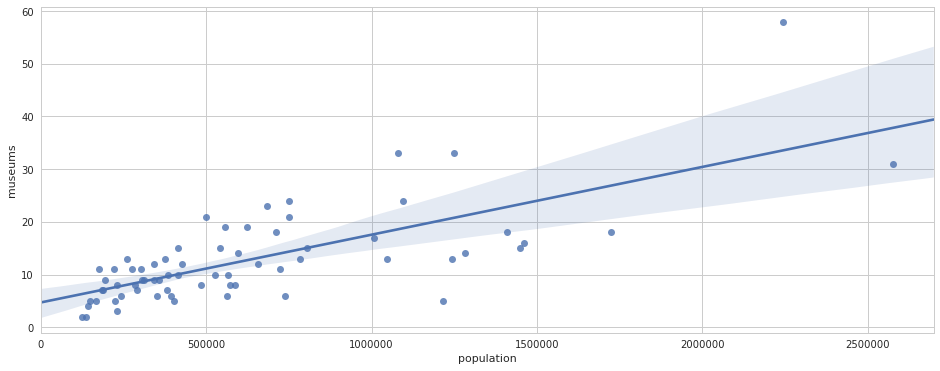

In [28]:
plt.figure(figsize=(16,6))
seaborn.regplot(data=joined, x="population", y="museums")

In [29]:
# Pearson's correlation coefficient
joined.corr()

,museums,population
museums,1.000000,0.720635
population,0.720635,1.000000


In [30]:
# TODO: estimate can be improved by correcting name mismatches,e.g. normalizing the writing of all names,
# e.g "ALPES DE HAUTE PROVENCE" vs "ALPES-DE-HAUTE-PROVENCE"

In [ ]:
def string_convert(s):
    s = s.upper()
    return s

# Machine Learning Task 

(100,)
(100, 2)


/home/polykarpos/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


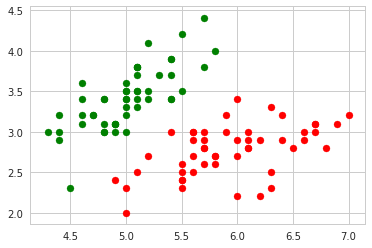

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
np.set_printoptions(precision=2)  # to have simpler print outputs with numpy
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[:, :2]
X = X[y < 2]
y = y[y < 2]
X = np.asarray(X, dtype=np.float)
y = np.asarray(y, dtype=np.float)  
y[y == 0] = -1

print(y.shape)
print(X.shape)

plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')


Assume we would like to minimize the L2 penalized logistic regression function. 

$$f(w) = \sum_{i=1}^n \log(1 + \exp(- y_i (x_i^\top w)))) + \lambda \|w\|^2$$

When we use the convention that $y=1$ for the positive class and $y=-1$ for the negative class
the model reads:

$$
\hat{w} = \mathop{\textrm{argmin}}_{w} \sum_{i=1}^n \log(1 + \exp(- y_i (x_i^\top w )))) + \lambda \|w\|^2
$$

where $w$ is a vector of coefficients of size $p$ and $\lambda > 0$ is a regularization parameter.



1) Write the formulas for the gradient and the Hessian matrix of f at point w 

2) Minimize f using Newton's method by applying the update rule 

$$
w = w -  H^{-1} \nabla f(w_t)^\top
$$

where $H$ is the Hessian and $\nabla f(w_t)$ the gradient at iteration t.

3a) What is the benefit of using the regularization term $\lambda \|w\|^2$?  

3b) How would you choose the value of the regularization parameter  $\lambda$, in order to get a robust model?

3c) Assume you would also like to perform some feature selection while minimizing f. What would you change in the objective function f in order to get the most sparse or simple solution to problem and why?


In [32]:
# TODO

def logistic_function(X, y, w):
    f=(np.sum(np.log(1. + np.exp(- y * np.dot(X, w)))) + alpha*linalg.norm(w) **2)
    return f


def gradient(X, y, w):
    # TODO
    return grad


def hessian(X, y, w):
    # TODO
    return hess


def newton_logistic(X, y):
    w = np.zeros(X.shape[1])    
    objective_values = []
    #show that the objective value drops at each iteration  

    return w

In [33]:
alpha = 0.1
w = newton_logistic(X, y)

## Answers

3a) Regularization term penalizes high model complexity. High model complexity is associated with a risk for overfitting.

3b) Choose lambda through automated hyperparameter optimization with cross-validation, e.g. in scikit-learn:
    `sklearn.linear_model.LogisticRegressionCV`, or more generally, `sklearn.model_selection.GridSearchCV` or `sklearn.model_selection.RandomizedSearchCV`
    
3c) Using L1-regularization ("lasso", L1 norm instead of L2 norm) enables a kind of automatic feature selection by zeroing out some coefficients, which are weights on features.

# Bonus Task

In this task you have to design a routine that will be able to match the names between two different lists. Actually, we provide to you two lists of names contained in files `A.txt` and `B.txt` (each line corresponds to a single name). Your routine should match each one of the name of the first list (`A.txt`) with one of them contained in the second list (`B.txt`). You should also take into account that each name of the first list match with only one of the names provided in the second one. Last but not least, you are free to select whatever similarity measure you like.

For instance, the name `barbara simmons` of the first list (`A.txt`) matches with that of `barbara simmond` on the second list.

In [34]:
#Please add your code here

## Read Data

In [35]:
!head A.txt

In [36]:
A = pandas.read_csv("A.txt", names=["name"])
B = pandas.read_csv("B.txt", names=["name"])

In [37]:
A.shape

(1000, 1)

In [38]:
B.shape

(1000, 1)

In [39]:
A.head()

,name
0,barbara simmons
1,wayne martin
2,jesse simmons
3,louis lewis
4,lori moore


In [40]:
B.head()

,name
0,raymond wazrren
1,brian robinsown
2,loxuis romero
3,bocnie ray
4,clraig hart


In [41]:
A = A.sort_values(by="name")
B = B.sort_values(by="name")

In [53]:
A.head()

,name
240,aaron lopez
799,aaron meyer
852,aaron ryan
82,adam holmes
913,adam hughes


In [54]:
B.head()

,name
570,aaron lopeyz
924,aaron meyez
248,aatricia kennedy
349,acna vasquez
633,acron ryan


## String Distance Metric

In [44]:
from difflib import SequenceMatcher

In [45]:
def string_match(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [46]:
string_match("aaron lopez", "aaron lopeyz")

0.9565217391304348

In [47]:
string_match("aaron lopez", "andrey welch")

0.34782608695652173

## Matching Algorithm

In [48]:
import itertools

In [51]:
def match_names2(A, B, maxiter=None):
    """naive matching..."""
    matches = []
    i = 0
    for a in A["name"]:
        if maxiter and i > maxiter:
            return matches
        best_match = None
        mm = 0.0
        for b in B["name"]:
            m = string_match(a, b)
            if m > mm:
                mm = m
                best_match = b
        matches.append((a, best_match))
        i += 1
    return matches
            

In [52]:
match_names2(A, B, maxiter=100)

[('aaron lopez', 'aaron lopeyz'),
 ('aaron meyer', 'aaron meyez'),
 ('aaron ryan', 'acron ryan'),
 ('adam holmes', 'adfm holmes'),
 ('adam hughes', 'adam hugohes'),
 ('adam olson', 'adam olsbn'),
 ('adam rogers', 'adam roger'),
 ('adam thomas', 'adam ythomas'),
 ('alan dunn', 'alan deunn'),
 ('alan marshall', 'alan marbhall'),
 ('alan murray', 'alan mqrray'),
 ('alan ray', 'malan ray'),
 ('alan ray', 'malan ray'),
 ('alan richardson', 'alan rsichardson'),
 ('albert alexander', 'albert alegxander'),
 ('albert anderson', 'albert anyderson'),
 ('albert baker', 'rlbert baker'),
 ('albert crawford', 'ajbert crawford'),
 ('albert morgan', 'albert miorgan'),
 ('albert perez', 'alberb perez'),
 ('albert ramirez', 'albert raxirez'),
 ('alice cook', 'aliwe cook'),
 ('alice green', 'alice grdeen'),
 ('alice long', 'alice lonmg'),
 ('alice matthews', 'alice matthdws'),
 ('alice morales', 'aliceg morales'),
 ('alice ruiz', 'alico ruiz'),
 ('alice russell', 'wlice russell'),
 ('alice stone', 'alice 

^^ first test works, now look at performance

In [55]:
%time matches = match_names2(A, B, maxiter=None)

CPU times: user 55.4 s, sys: 4 ms, total: 55.5 s
Wall time: 55 s


In [56]:
matches[:100]

[('aaron lopez', 'aaron lopeyz'),
 ('aaron meyer', 'aaron meyez'),
 ('aaron ryan', 'acron ryan'),
 ('adam holmes', 'adfm holmes'),
 ('adam hughes', 'adam hugohes'),
 ('adam olson', 'adam olsbn'),
 ('adam rogers', 'adam roger'),
 ('adam thomas', 'adam ythomas'),
 ('alan dunn', 'alan deunn'),
 ('alan marshall', 'alan marbhall'),
 ('alan murray', 'alan mqrray'),
 ('alan ray', 'malan ray'),
 ('alan ray', 'malan ray'),
 ('alan richardson', 'alan rsichardson'),
 ('albert alexander', 'albert alegxander'),
 ('albert anderson', 'albert anyderson'),
 ('albert baker', 'rlbert baker'),
 ('albert crawford', 'ajbert crawford'),
 ('albert morgan', 'albert miorgan'),
 ('albert perez', 'alberb perez'),
 ('albert ramirez', 'albert raxirez'),
 ('alice cook', 'aliwe cook'),
 ('alice green', 'alice grdeen'),
 ('alice long', 'alice lonmg'),
 ('alice matthews', 'alice matthdws'),
 ('alice morales', 'aliceg morales'),
 ('alice ruiz', 'alico ruiz'),
 ('alice russell', 'wlice russell'),
 ('alice stone', 'alice 

^^ brute force seems to work here

In [57]:
len(matches)

1000